In [1]:
import pandas as pd
import numpy as np
import sys,os,time
from tqdm import trange,tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

In [3]:
os.chdir("./stabilityTest")
os.getcwd()

'/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest'

In [5]:
def get_loc(cwd,key):
    loc_list=[]
    for root, dirs, files in os.walk(cwd):
        for file in files:
            if file.endswith(key):
                loc = os.path.join(root, file)
                loc_list.append(loc)
    return loc_list

In [5]:
loc_list = get_loc(os.getcwd(),"A1corr_maf_meta.txt")
loc_list

[]

#### Below is for OR Cigar plot

In [6]:
summary_list = get_loc(os.getcwd(),".meta")
summary_list

['/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest/PlinkMeta_withPC_noEAC.meta',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest/PlinkMeta_withPC_noSERA.meta',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest/PlinkMeta_withPC_noManchester.meta',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest/PlinkMeta_withPC_noEARTHA.meta',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest/PlinkMeta_withPC_noPEAC.meta',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest/PlinkMeta_withPC_noRAMS.meta',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest/PlinkMeta_withPC_noVienna.meta',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest/PlinkMeta_withPC_noEARTHB.meta',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest/PlinkMeta_withPC_noACPA.meta',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFf

In [7]:
summary_list = summary_list[:14]
summary_list

['/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest/PlinkMeta_withPC_noEAC.meta',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest/PlinkMeta_withPC_noSERA.meta',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest/PlinkMeta_withPC_noManchester.meta',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest/PlinkMeta_withPC_noEARTHA.meta',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest/PlinkMeta_withPC_noPEAC.meta',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest/PlinkMeta_withPC_noRAMS.meta',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest/PlinkMeta_withPC_noVienna.meta',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest/PlinkMeta_withPC_noEARTHB.meta',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFfilter/stabilityTest/PlinkMeta_withPC_noACPA.meta',
 '/exports/reum/CKe/Pipelinerun_withPC/RunMeta/noMAFf

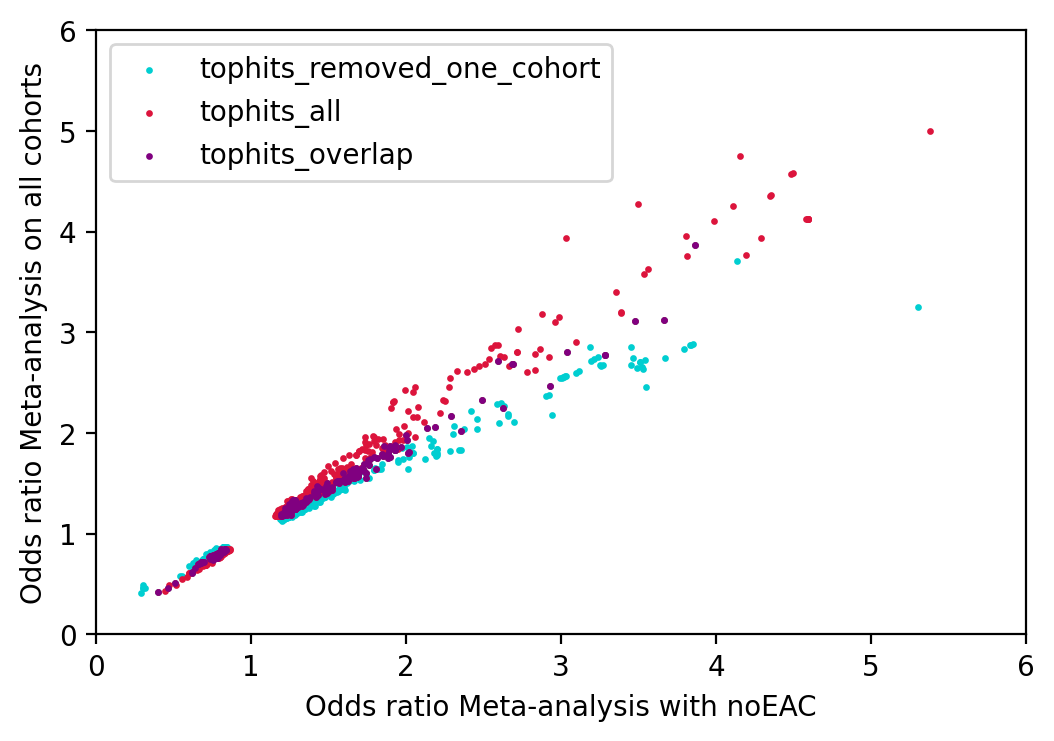

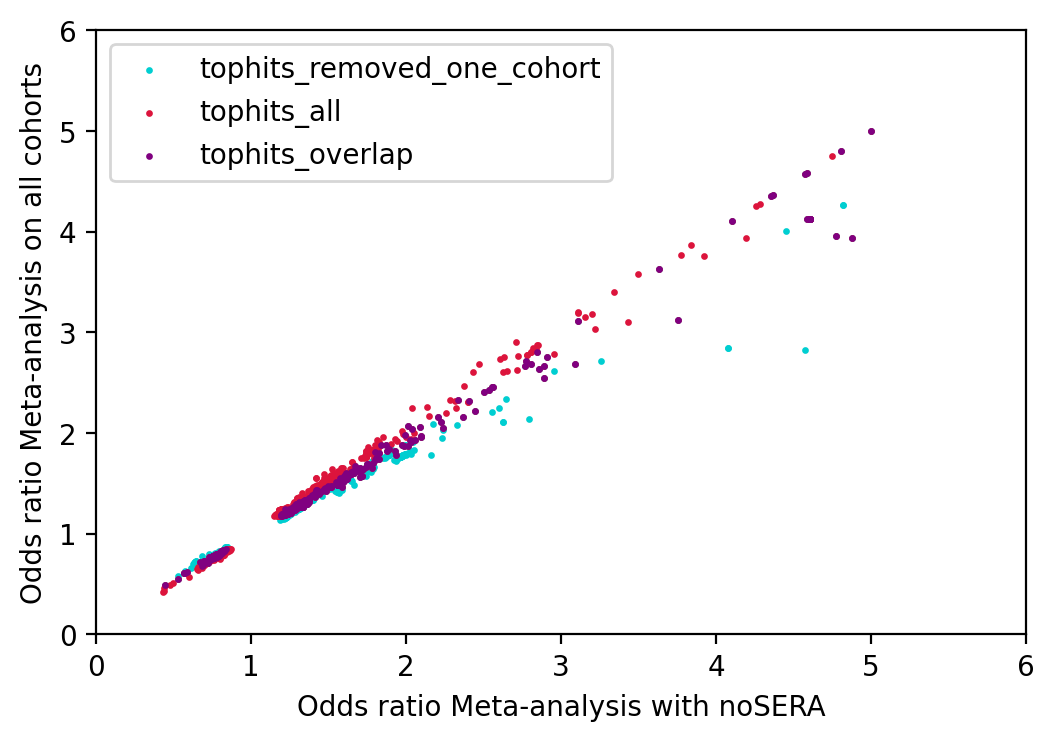

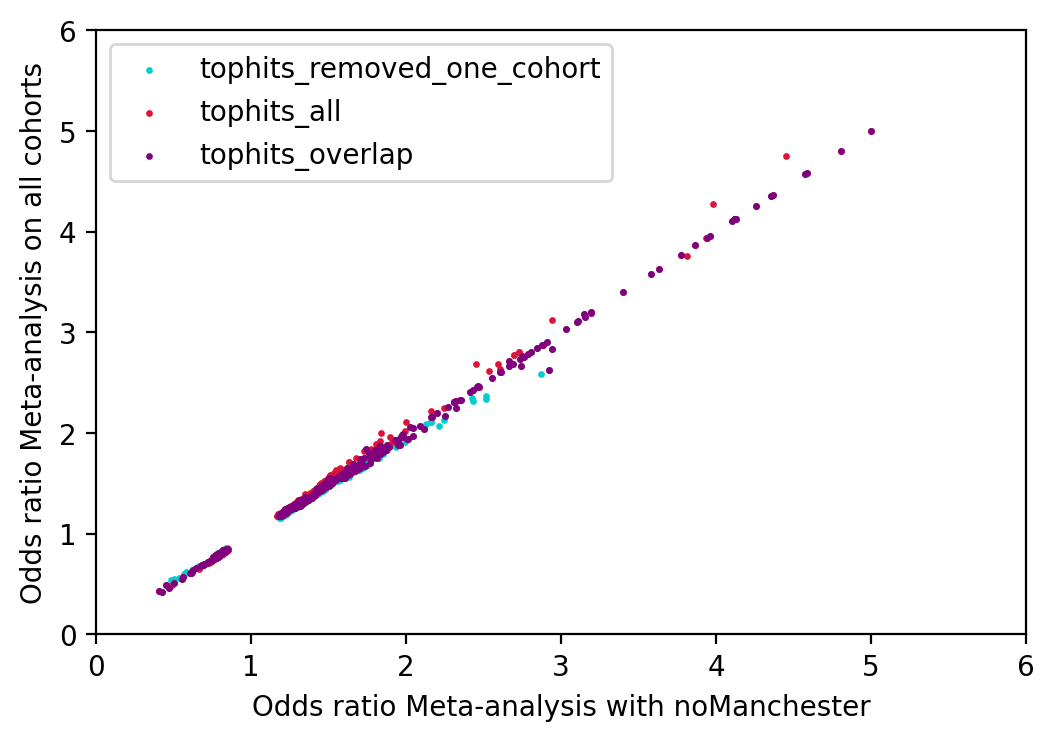

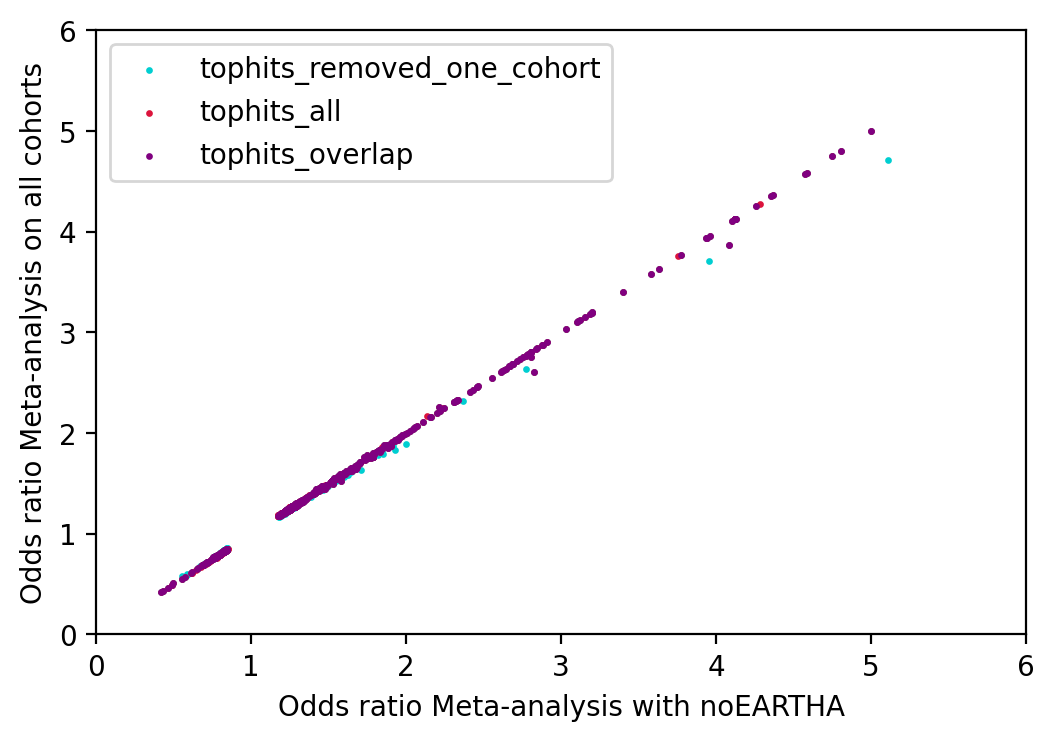

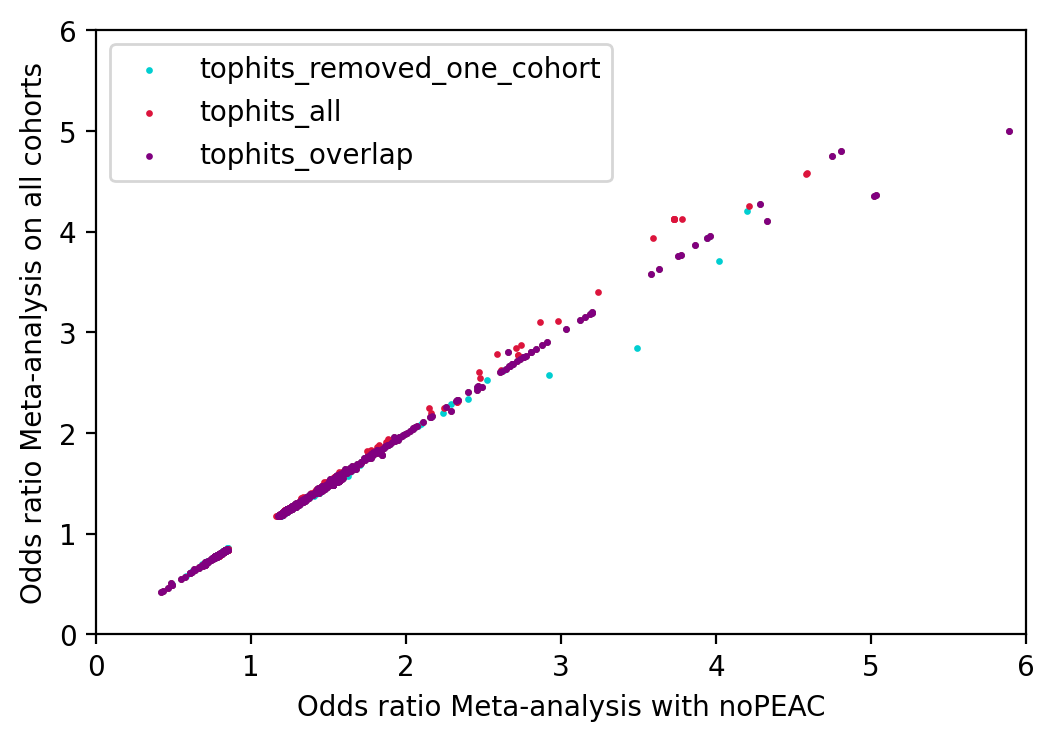

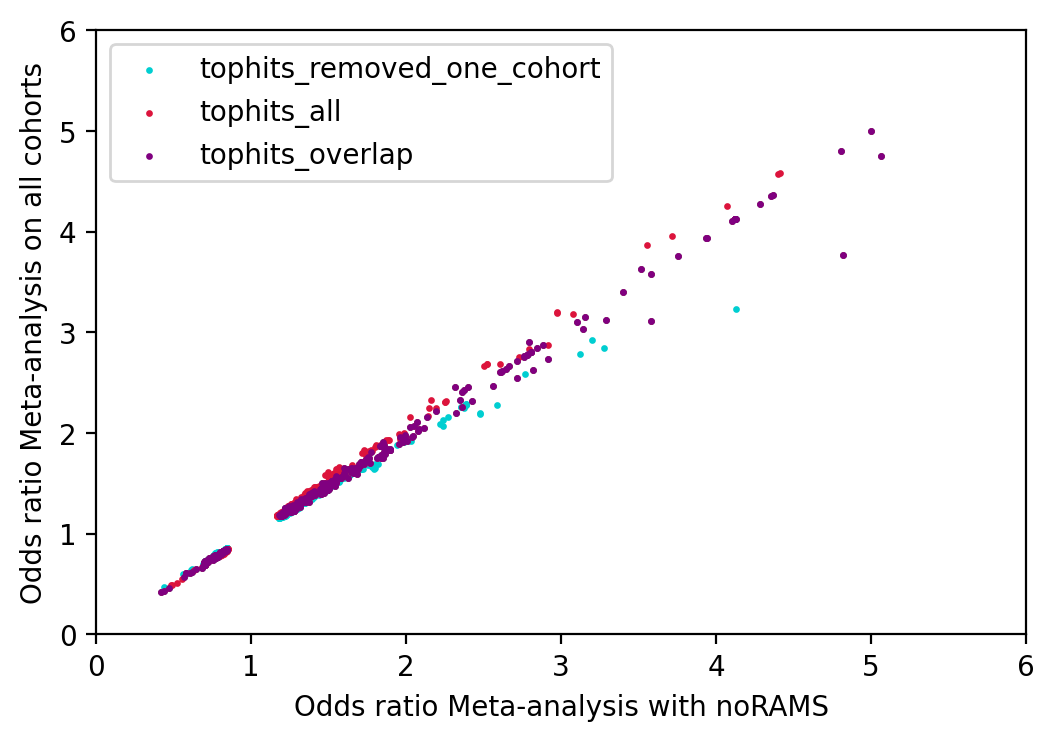

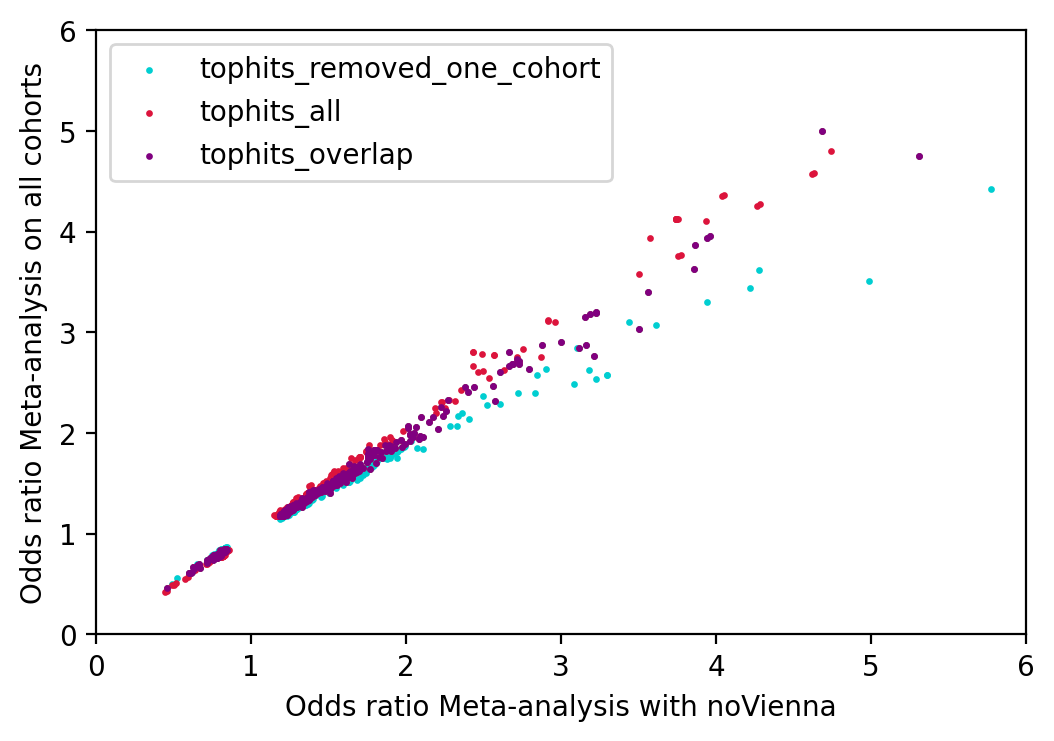

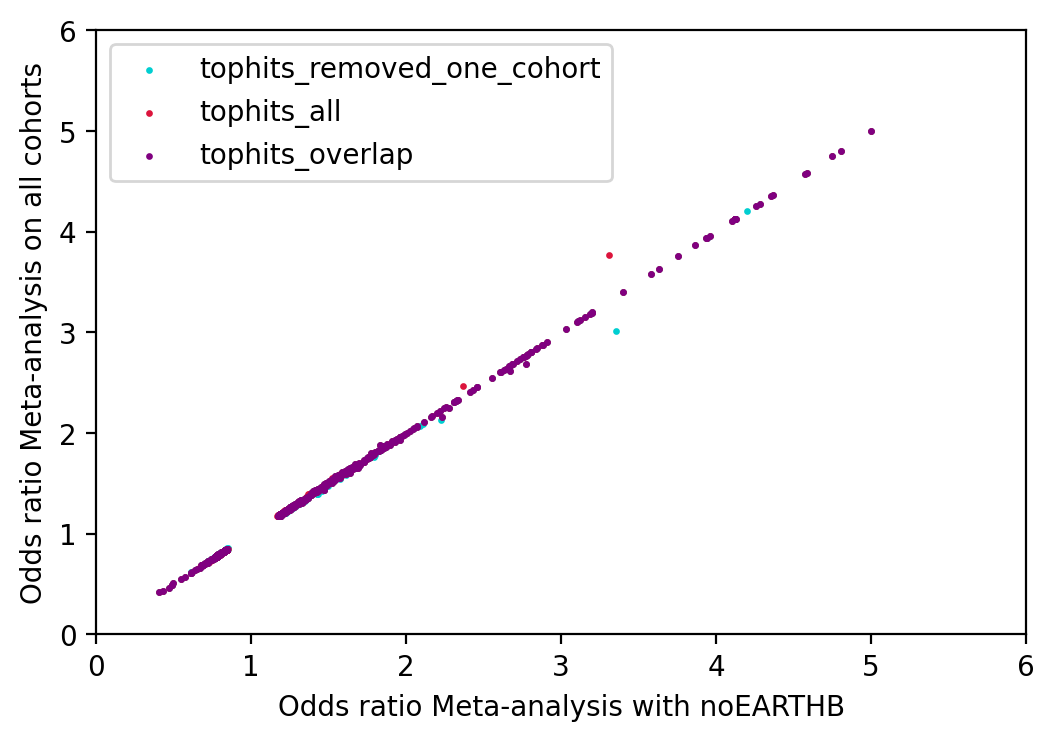

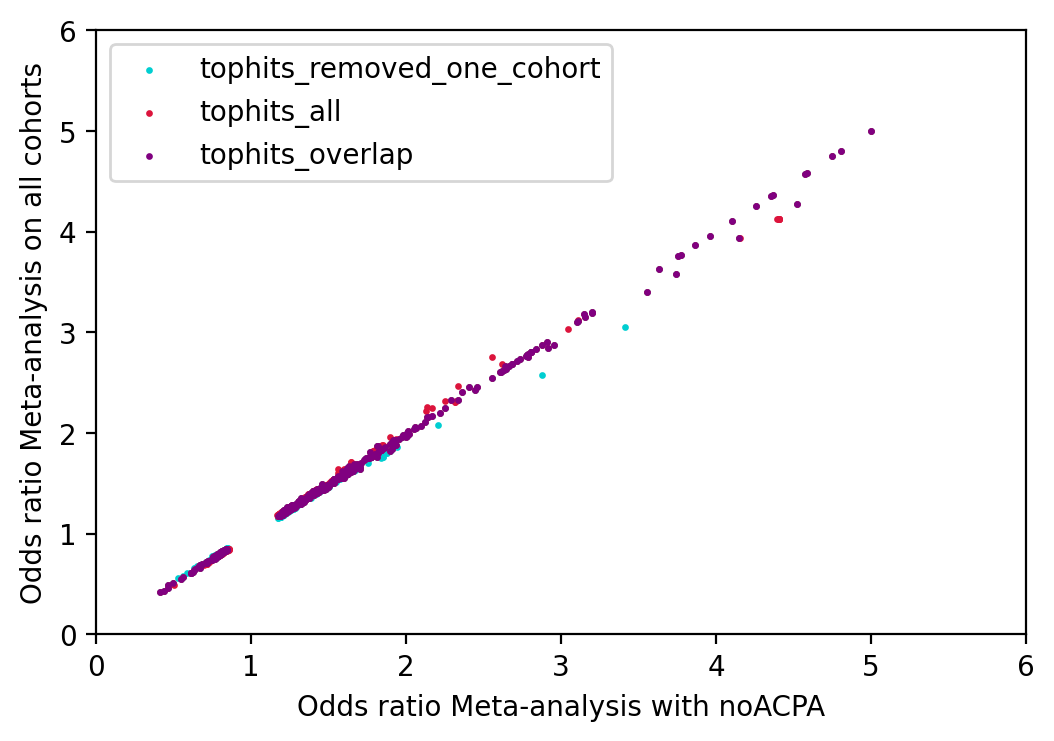

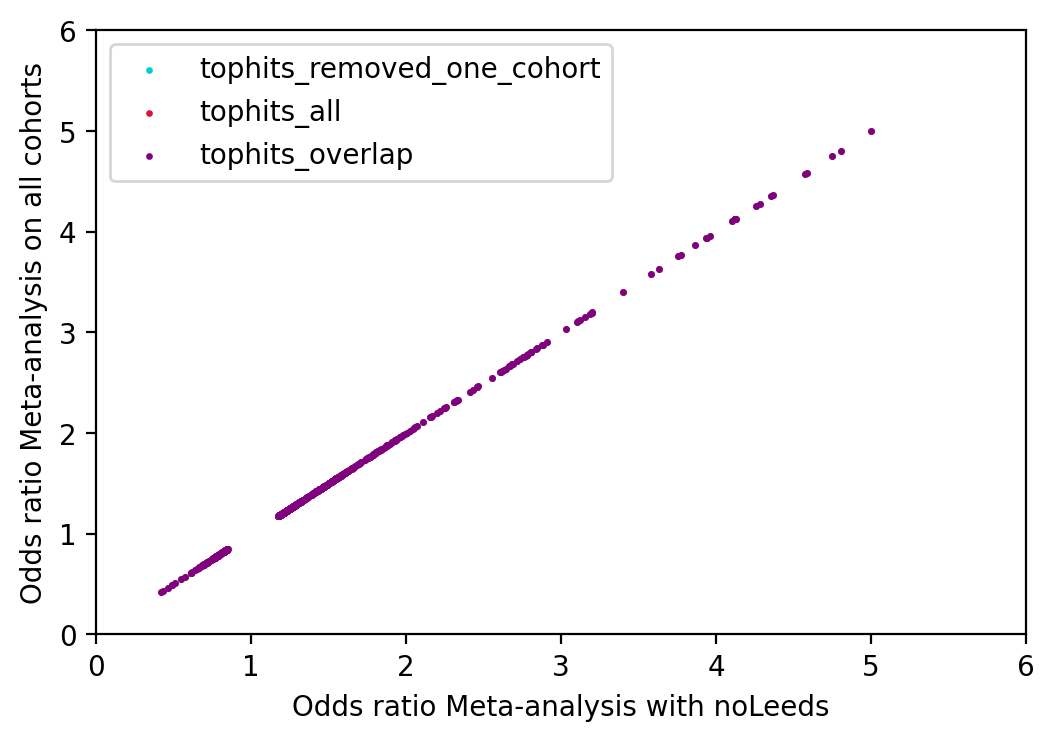

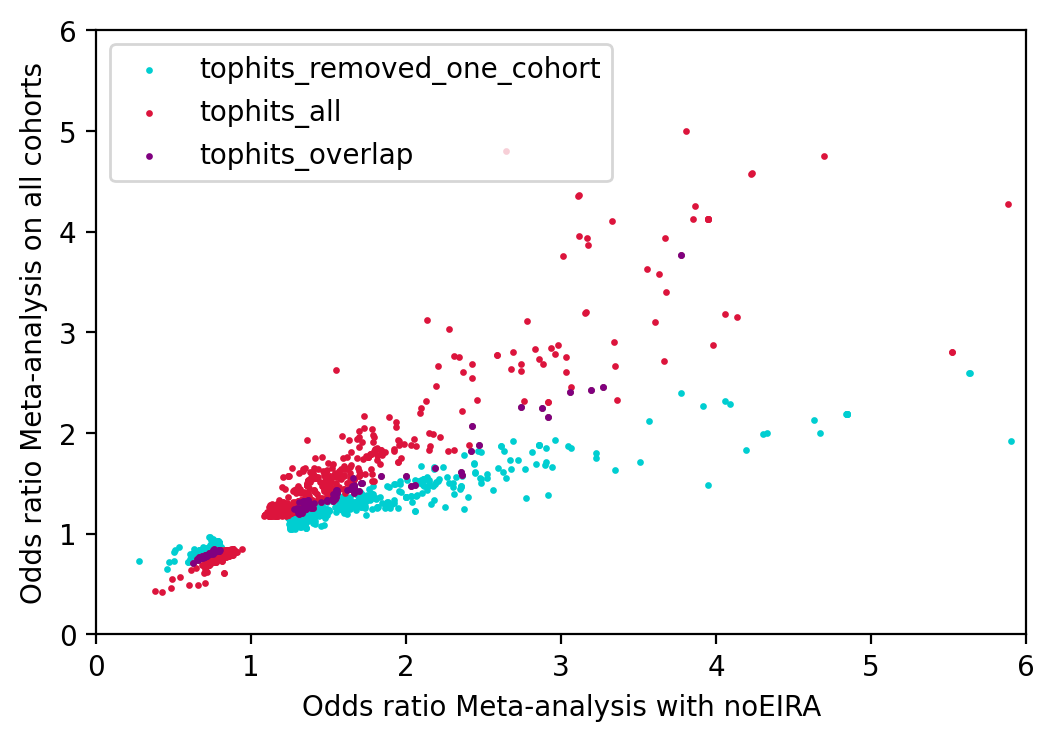

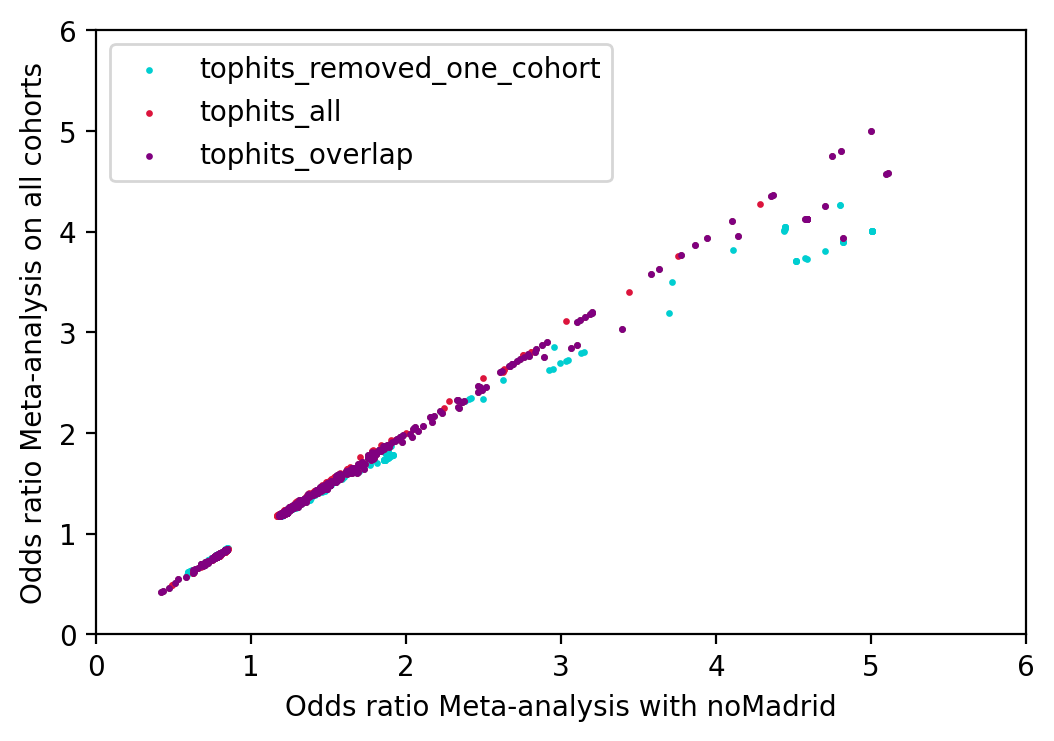

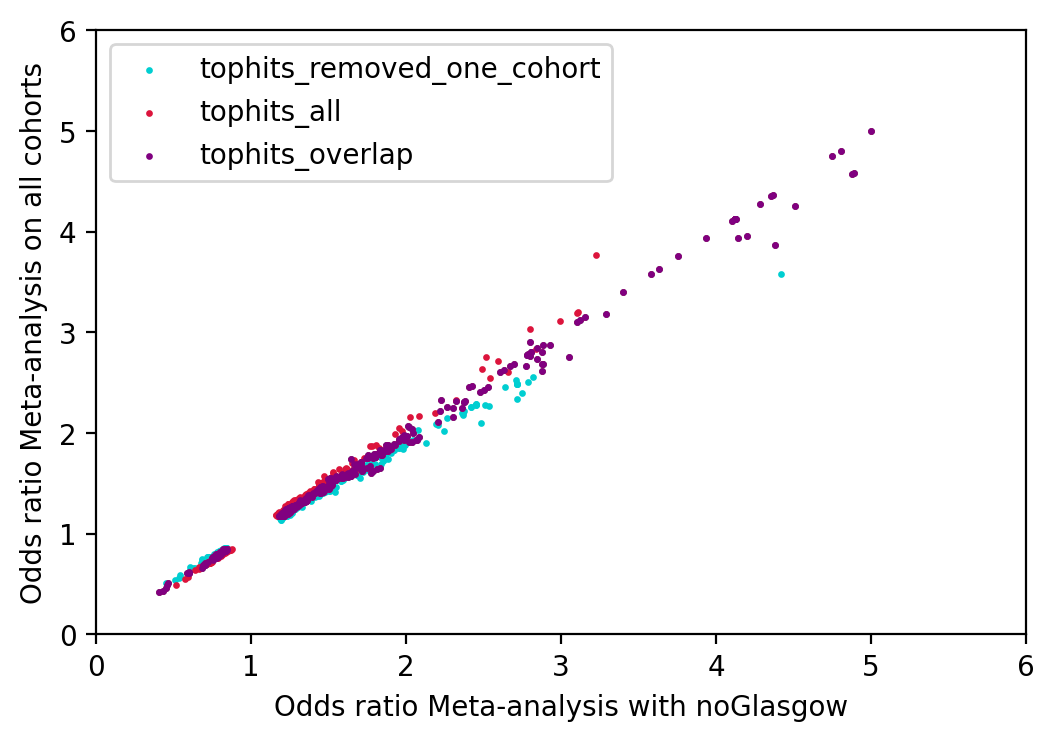

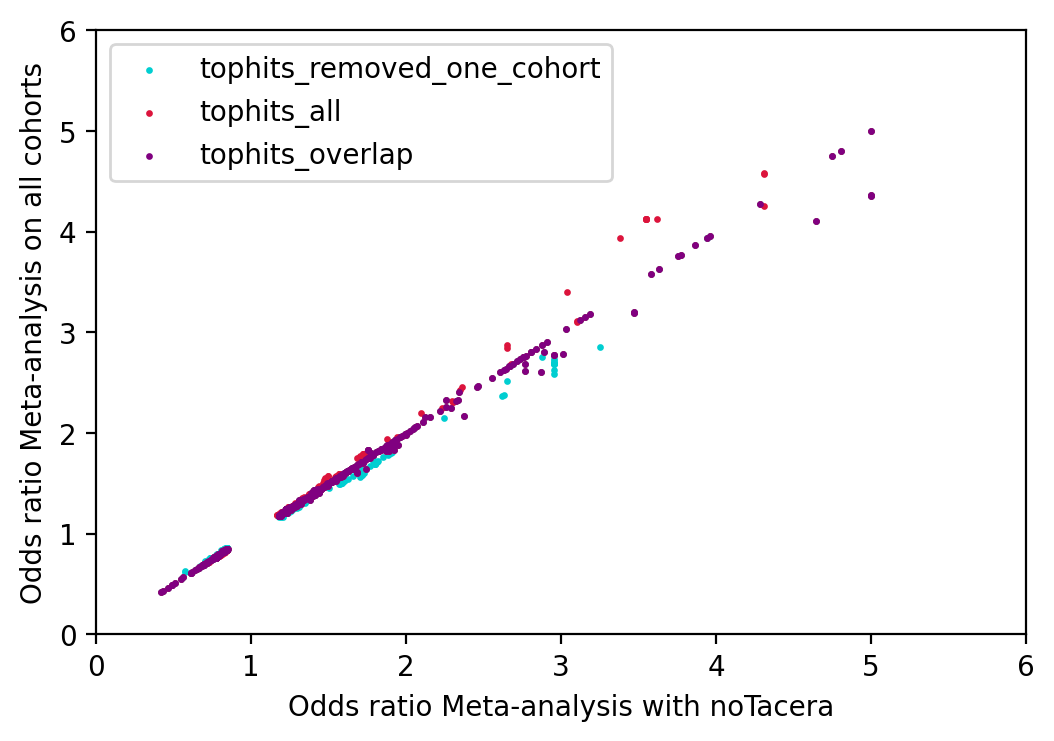

In [11]:
for i in range(len(summary_list)):
    summary_origin = pd.read_csv(summary_list[i],sep="\s+")
    cohort = os.path.basename(summary_list[i]).split(".")[0].split("_")[-1]
#     OR = np.exp(summary_origin['Effect'])
#     summary_origin.insert(6,'OR',OR)
    Merged = pd.merge(summary_origin,summary_all,left_on=['SNP'],right_on=['SNP'],how='inner',suffixes=("_removed","_all"))
    tophits_removed = Merged.sort_values(['P_removed'])[:1000]
    tophits_all = Merged.sort_values(['P_all'])[:1000]
    common_snp = pd.merge(tophits_removed,tophits_all,how='inner',left_on="SNP",right_on='SNP')
#     tophits_removed = pd.merge(tophits_removed,Merged,how='left',on="MarkerName")
#     tophits_all = pd.merge(tophits_all,Merged,how='left',on="MarkerName")
    #SCATTER PLOT Odds ratio
    plt.figure(dpi=200)
    plt.xlabel('Odds ratio Meta-analysis with '+cohort)
    plt.ylabel('Odds ratio Meta-analysis on all cohorts')
    plt.xlim(xmax=6,xmin=0)
    plt.ylim(ymax=6,ymin=0)
#plt.xticks([])
#plt.yticks([])
    colors1 = '#00CED1'
    colors2 = '#DC143C'
    colors3 = 'Purple'
    temp = "OR_removed_"+cohort
    plt.scatter(tophits_removed['OR_removed'],tophits_removed['OR_all'],c=colors1,label='tophits_removed_one_cohort',s=2)
    plt.scatter(tophits_all['OR_removed'],tophits_all['OR_all'],c=colors2,label='tophits_all',s=2)
    plt.scatter(common_snp['OR_removed_x'],common_snp['OR_all_y'],c=colors3,label='tophits_overlap',s=2)
# plt.scatter(,c=colors2,label='Samantha\'s GWAS')
    plt.legend()
    plt.savefig(cohort+"_sensitivity_OR.jpg")
    plt.show()

In [9]:
#first load in summary_all to compare
# summary_origin = pd.read_csv("PlinkMeta_withPC_noEAC.meta",sep='\s+')
summary_all = pd.read_csv("../PlinkMeta_A1corr_noMAFfilter_Allcohorts_withPC.meta",sep='\s+')

In [12]:
summary_origin

,CHR,BP,SNP,A1,A2,N,P,P(R),OR,OR(R),Q,I
0,1,693731,1:693731:G,G,?,10,0.53300,0.53300,1.0540,1.0540,0.7504,0.00
1,1,705882,1:705882:A,A,?,4,0.53300,0.53300,1.3375,1.3375,0.5038,0.00
2,1,706368,1:706368:G,G,?,5,0.30550,0.30550,1.2333,1.2333,0.4392,0.00
3,1,713977,1:713977:T,T,?,2,0.07158,0.07158,3.6963,3.6963,0.4500,0.00
4,1,714439,1:714439:A,A,?,3,0.15050,0.15050,3.0161,3.0161,0.6615,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
8441796,22,51226692,22:51226692:A,A,?,2,0.44680,0.44680,1.7068,1.7068,0.5401,0.00
8441797,22,51229805,22:51229805:C,C,?,12,0.80540,0.80540,1.0230,1.0230,0.8304,0.00
8441798,22,51232488,22:51232488:G,G,?,7,0.57890,0.47260,1.1749,1.2687,0.3517,10.15
8441799,22,51237063,22:51237063:C,C,?,12,0.53540,0.53540,0.9610,0.9610,0.4796,0.00


In [10]:
summary_all

,CHR,BP,SNP,A1,A2,N,P,P(R),OR,OR(R),Q,I
0,1,693731,1:693731:G,G,?,11,0.62190,0.62190,1.0398,1.0398,0.7531,0.00
1,1,705882,1:705882:A,A,?,5,0.39180,0.39180,1.4027,1.4027,0.5642,0.00
2,1,706368,1:706368:G,G,?,5,0.57840,0.67950,1.1170,1.1319,0.2470,26.18
3,1,713977,1:713977:T,T,?,3,0.03283,0.03283,3.8098,3.8098,0.7492,0.00
4,1,714439,1:714439:A,A,?,4,0.06788,0.06788,3.2967,3.2967,0.8314,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
8913185,22,51226692,22:51226692:A,A,?,2,0.44680,0.44680,1.7068,1.7068,0.5401,0.00
8913186,22,51229805,22:51229805:C,C,?,13,0.92950,0.92950,1.0077,1.0077,0.8599,0.00
8913187,22,51232488,22:51232488:G,G,?,8,0.48810,0.48810,1.1980,1.1980,0.4454,0.00
8913188,22,51237063,22:51237063:C,C,?,13,0.27680,0.27680,0.9360,0.9360,0.5234,0.00


In [21]:
Merged = pd.merge(summary_origin,summary_all,left_on=['SNP'],right_on=['SNP'],how='inner',suffixes=("_removed_cohort","_all"))
Merged

,CHR_removed_cohort,BP_removed_cohort,SNP,A1_removed_cohort,A2_removed_cohort,N_removed_cohort,P_removed_cohort,P(R)_removed_cohort,OR_removed_cohort,OR(R)_removed_cohort,...,BP_all,A1_all,A2_all,N_all,P_all,P(R)_all,OR_all,OR(R)_all,Q_all,I_all
0,1,693731,1:693731:G,G,?,8,0.63740,0.63740,1.0425,1.0425,...,693731,G,?,9,0.77520,0.77520,1.0238,1.0238,0.8057,0.00
1,1,705882,1:705882:A,A,?,2,0.79100,0.95680,1.1535,0.9579,...,705882,A,?,3,0.64510,0.64510,1.2222,1.2222,0.4158,0.00
2,1,706368,1:706368:G,G,?,4,0.32770,0.36630,1.2319,1.3461,...,706368,G,?,5,0.57840,0.67950,1.1170,1.1319,0.2470,26.18
3,1,713977,1:713977:T,T,?,2,0.07158,0.07158,3.6963,3.6963,...,713977,T,?,3,0.03283,0.03283,3.8098,3.8098,0.7492,0.00
4,1,714439,1:714439:A,A,?,2,0.14810,0.14810,3.6503,3.6503,...,714439,A,?,3,0.06522,0.06522,3.8180,3.8180,0.7182,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7827161,22,51223637,22:51223637:A,A,?,9,0.27630,0.27630,1.1263,1.1263,...,51223637,A,?,10,0.23590,0.23590,1.1290,1.1290,0.8247,0.00
7827162,22,51229805,22:51229805:C,C,?,9,0.76550,0.76550,1.0309,1.0309,...,51229805,C,?,10,0.89470,0.89470,1.0126,1.0126,0.8081,0.00
7827163,22,51232488,22:51232488:G,G,?,5,0.79730,0.55530,1.0865,1.3397,...,51232488,G,?,6,0.64610,0.53620,1.1389,1.2373,0.3007,17.46
7827164,22,51237063,22:51237063:C,C,?,9,0.33870,0.31510,0.9345,0.9071,...,51237063,C,?,10,0.17250,0.16400,0.9139,0.8960,0.3806,6.62


In [23]:
tophits_removed = Merged.sort_values(['P_removed_cohort'])[:1000]
tophits_all = Merged.sort_values(['P_all'])[:1000]

In [25]:
common_snp = pd.merge(tophits_removed,tophits_all,how='inner',left_on="SNP",right_on='SNP')
common_snp

,CHR_removed_cohort_x,BP_removed_cohort_x,SNP,A1_removed_cohort_x,A2_removed_cohort_x,N_removed_cohort_x,P_removed_cohort_x,P(R)_removed_cohort_x,OR_removed_cohort_x,OR(R)_removed_cohort_x,...,BP_all_y,A1_all_y,A2_all_y,N_all_y,P_all_y,P(R)_all_y,OR_all_y,OR(R)_all_y,Q_all_y,I_all_y
0,1,200849360,1:200849360:C,C,?,9,8.617000e-07,8.617000e-07,0.7740,0.7740,...,200849360,C,?,10,4.103000e-05,4.372000e-02,0.8220,0.8526,0.0915,39.92
1,8,74768760,8:74768760:T,T,?,9,1.574000e-06,1.574000e-06,2.0387,2.0387,...,74768760,T,?,10,3.983000e-06,5.639000e-05,1.8957,1.8497,0.3838,6.26
2,8,74435989,8:74435989:C,C,?,9,2.167000e-06,2.167000e-06,1.4799,1.4799,...,74435989,C,?,10,1.592000e-07,1.592000e-07,1.4937,1.4937,0.9050,0.00
3,1,1005806,1:1005806:T,T,?,9,2.512000e-06,6.843000e-04,1.3860,1.3752,...,1005806,T,?,10,1.894000e-04,7.316000e-02,1.2720,1.2566,0.0135,56.77
4,8,74785150,8:74785150:C,C,?,9,2.515000e-06,2.515000e-06,1.9475,1.9475,...,74785150,C,?,10,1.408000e-06,1.408000e-06,1.8837,1.8837,0.7288,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,8,15061949,8:15061949:G,G,?,9,2.683000e-04,2.683000e-04,1.4897,1.4897,...,15061949,G,?,10,2.261000e-04,2.261000e-04,1.4467,1.4467,0.7926,0.00
422,8,15063195,8:15063195:C,C,?,9,2.683000e-04,2.683000e-04,1.4897,1.4897,...,15063195,C,?,10,2.261000e-04,2.261000e-04,1.4467,1.4467,0.7926,0.00
423,8,15063352,8:15063352:A,A,?,9,2.683000e-04,2.683000e-04,1.4897,1.4897,...,15063352,A,?,10,2.261000e-04,2.261000e-04,1.4467,1.4467,0.7926,0.00
424,7,85654531,7:85654531:A,A,?,9,2.684000e-04,9.354000e-03,0.7978,0.8097,...,85654531,A,?,10,2.141000e-04,1.903000e-03,0.8088,0.8162,0.3696,7.86


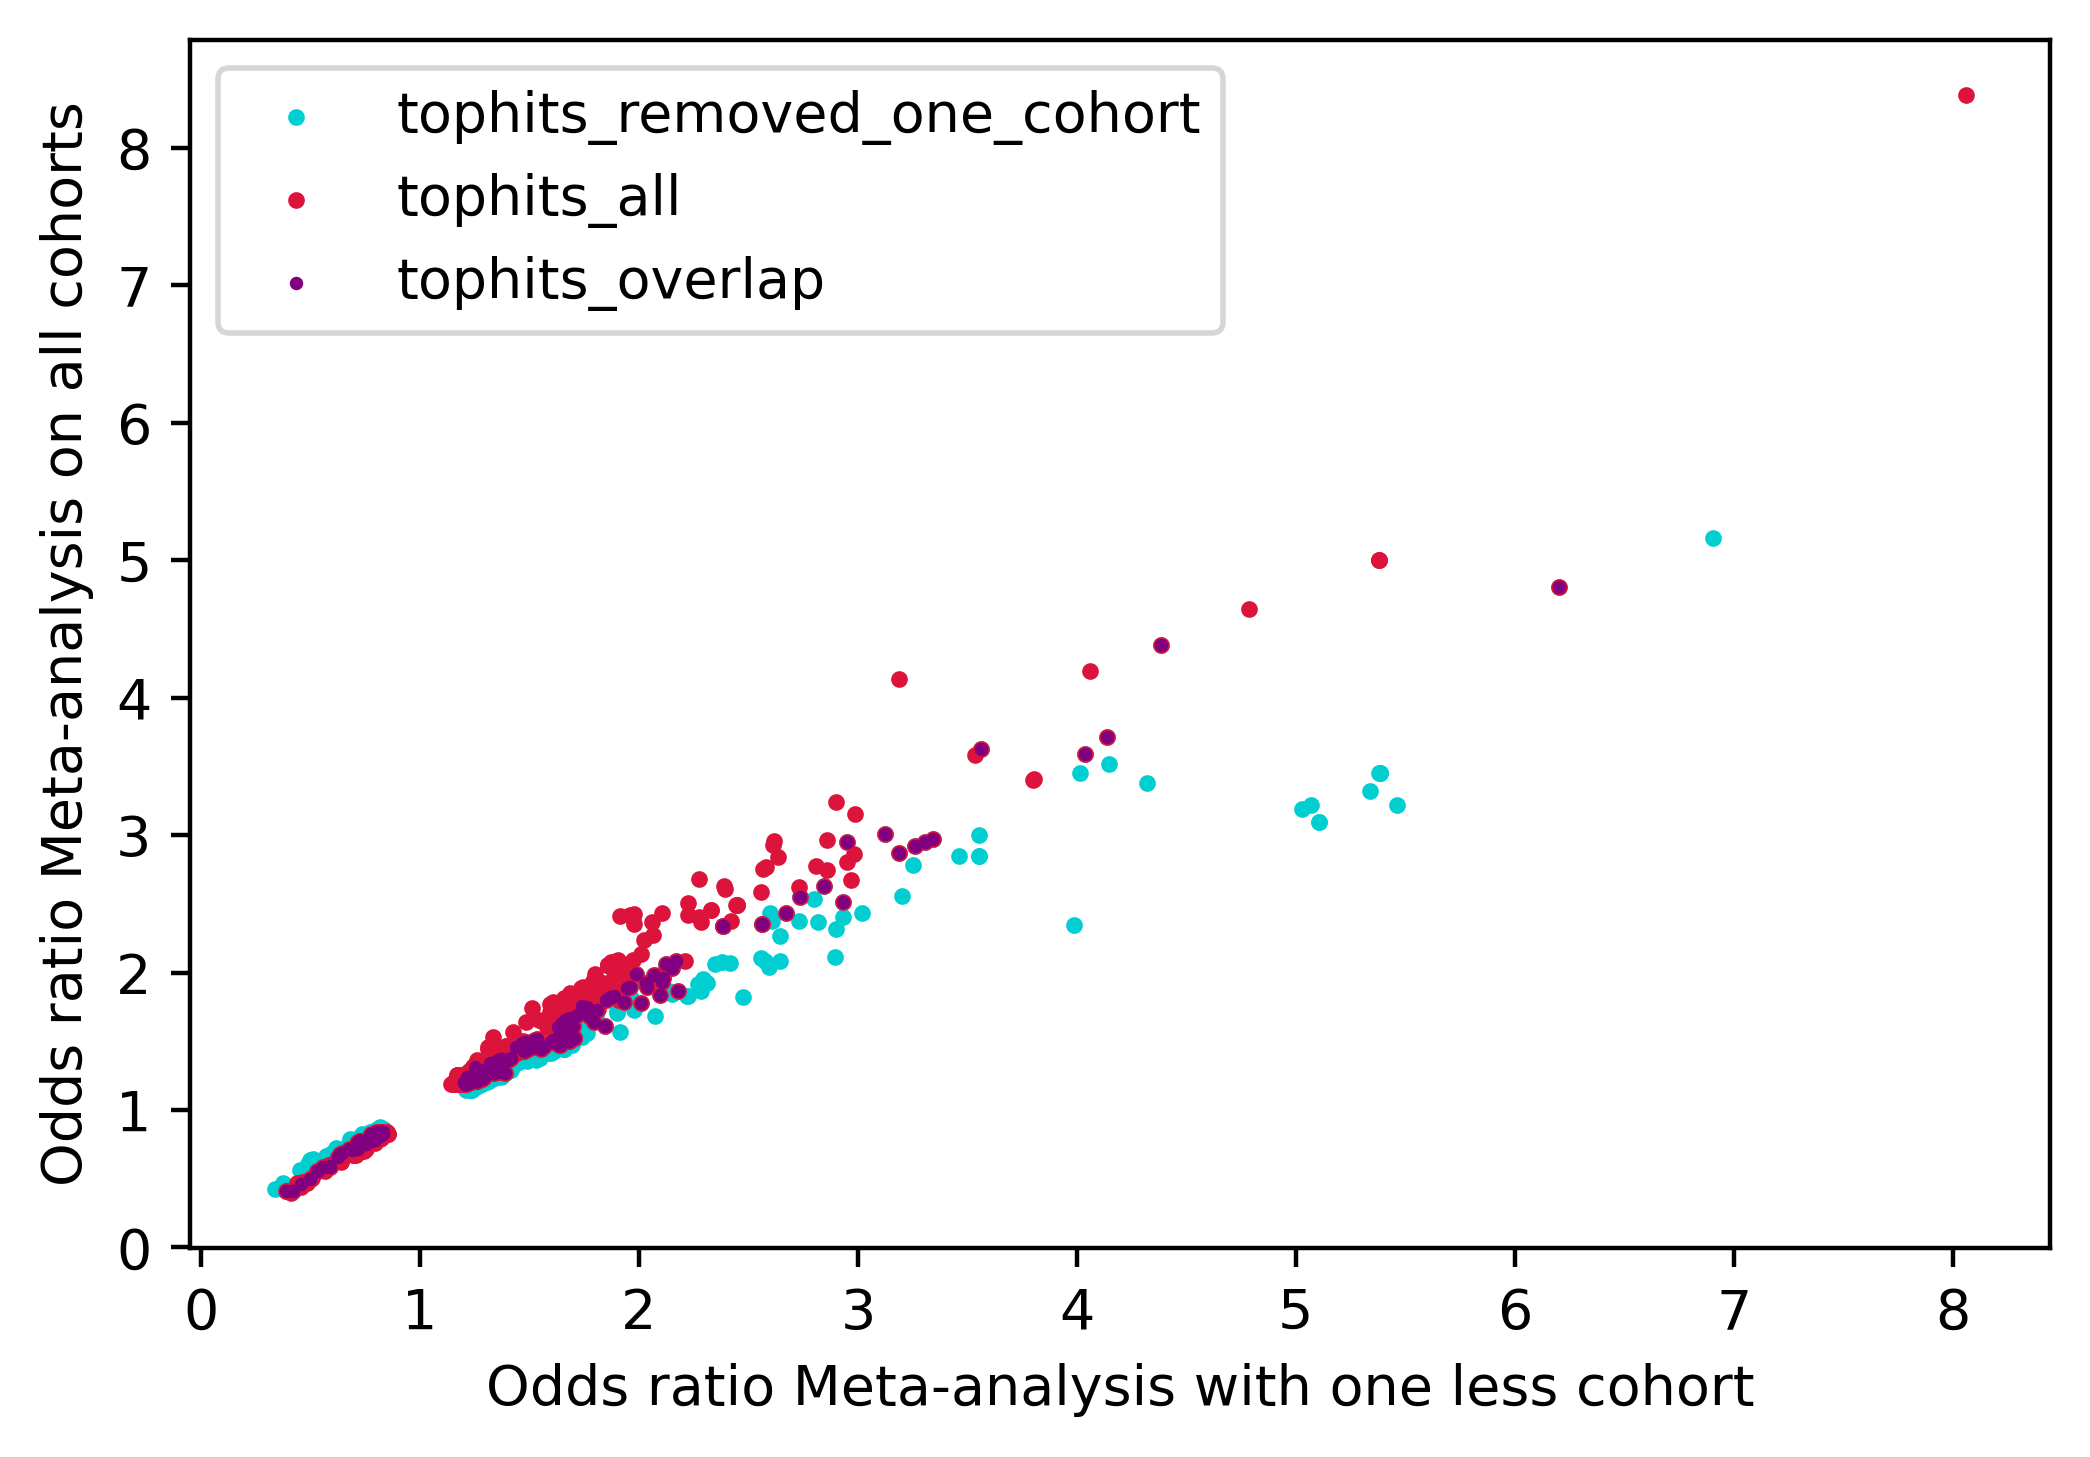

In [28]:
#SCATTER PLOT Odds ratio
#Plink meta-analysis, top 1000 snps from fixed effect model
plt.figure(dpi=400)
plt.xlabel('Odds ratio Meta-analysis with one less cohort')
plt.ylabel('Odds ratio Meta-analysis on all cohorts')
# plt.xlim(xmax=10,xmin=0)
# plt.ylim(ymax=10,ymin=0)
#plt.xticks([])
#plt.yticks([])

colors1 = '#00CED1'
colors2 = '#DC143C'
colors3 = 'Purple'

plt.scatter(tophits_removed['OR_removed_cohort'],tophits_removed['OR_all'],c=colors1,label='tophits_removed_one_cohort',s=4)
plt.scatter(tophits_all['OR_removed_cohort'],tophits_all['OR_all'],c=colors2,label='tophits_all',s=4)
plt.scatter(common_snp['OR_removed_cohort_x'],common_snp['OR_all_y'],c=colors3,label='tophits_overlap',s=2)


plt.legend()
plt.show()
#Low stability
# plt.savefig("")